Prepare the environment
-----------------------

First we'll import various functions that we'll need for generating the report.

In [1]:
%matplotlib inline

from os import environ
from os.path import join, exists, expandvars
import pandas as pd
from skbio.draw import boxplots

from taxcompare.eval_framework import (get_expected_tables_lookup, 
                                       find_and_process_result_tables,
                                       compute_mock_results,
                                       compute_mantel,
                                       generate_pr_scatter_plots,
                                       boxplot_from_data_frame,
                                       heatmap_from_data_frame,
                                       method_by_dataset_a1,
                                       method_by_dataset_a2,
                                       performance_rank_comparisons,
                                       parameter_comparisons)

Configure local environment-specific values
-------------------------------------------

**This is the only cell that you will need to edit to generate reports locally.** After editing this cell, you can run all cells in this notebook to generate your analysis report. Some of the analyses make take a few minutes to run, and analyses at more specific taxonomic levels (e.g., genus or species) will be slower than analyses at more general taxonomic levels (e.g., phylum, class). 

**This cell will not run until you fill in a taxonomic level (``2`` through ``7``).**

In [2]:
## project_dir should be the directory where you've downloaded (or cloned) the 
## short-read-tax-assignment repository. 
project_dir = expandvars("$HOME/data/short-read-tax-assignment")

precomputed_results_dir = expandvars("$HOME/data/short-read-tax-assignment/data/precomputed-results/")
expected_results_dir = join(precomputed_results_dir, "simulated-community")

## results_dirs should contain the directory or directories where
## results can be found. By default, this is just the precomputed 
## results included with the project. If other results should be included, 
## absolute paths to those directories should be added to this list.
results_dirs = \
 [precomputed_results_dir,
  ]

## Taxonomic level at which analyses should be performed. Edit this to
## the desired taxonomic level. 
# 2: phylum, 3: class, 4: order, 5: family, 6: genus, 7: species
taxonomic_level = int(environ['taxonomic_level'])

## Reference choice (must be partial-ref or full-ref)
reference_choice = environ['reference_choice']

## Minimum number of times an OTU must be observed for it to be included in analyses. Edit this
## to analyze the effect of the minimum count on taxonomic results.
min_count = 1

# set to true if select tables should be written as Excel files (useful for publication)
write_xls_files = False

In [3]:
# Define the subdirectories where the data should be, and confirm that they exist.
simulated_results_dirs = [join(results_dir,"simulated-community") for results_dir in results_dirs]

for simulated_results_dir in simulated_results_dirs:
    assert exists(simulated_results_dir), "Simulated community result directory doesn't exist: %s" % simulated_results_dir

Find pre-computed tables, expected tables, and "query" tables
-------------------------------------------------------------

Next we'll use the paths defined above to find all of the tables that will be compared. These include the *pre-computed result* tables (i.e., the ones that the new methods will be compared to), the *expected result* tables (i.e., the tables containing the known composition of the mock microbial communities), and the *query result* tables (i.e., the tables generated with the new method(s) that we want to compare to the *pre-computed result* tables).

In [4]:
results = []
for simulated_results_dir in simulated_results_dirs:
    results += find_and_process_result_tables(simulated_results_dir)

In [5]:
# Uncomment for test runs (looks at a small subset of the data)

# from random import shuffle
# shuffle(results)
# results = results[:10]

In [6]:
result_fp = join(precomputed_results_dir,'simulated-community', 'level%d-results.csv') % taxonomic_level
if exists(result_fp):
    simulated_results = pd.DataFrame.from_csv(result_fp)
else:
    expected_tables = get_expected_tables_lookup(expected_results_dir, level=taxonomic_level)
    simulated_results = compute_mock_results(results, expected_tables, taxonomy_level=taxonomic_level, min_count=min_count)
    simulated_results.to_csv()

In [7]:
refernece_choice_v = [e.endswith(reference_choice) for e in simulated_results['Parameters']]
simulated_results = simulated_results[refernece_choice_v]

Evalution 1: Compute and summarize precision, recall, and F-measure
-------------------------------------------------------------------

In this evaluation, we compute and summarize precision, recall, and F-measure of each result (pre-computed and query) based on the known composition of the simulated communities. We then summarize the results in two ways: first with boxplots, and second with a table of the top methods based on their F-measures.

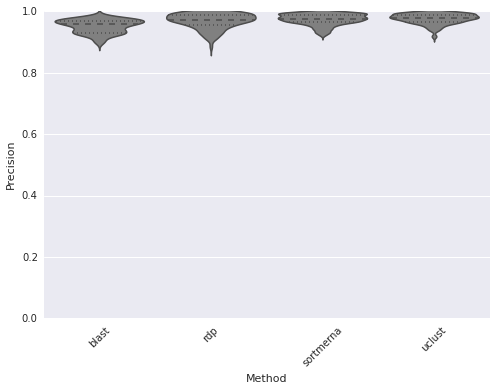

In [8]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="Precision")

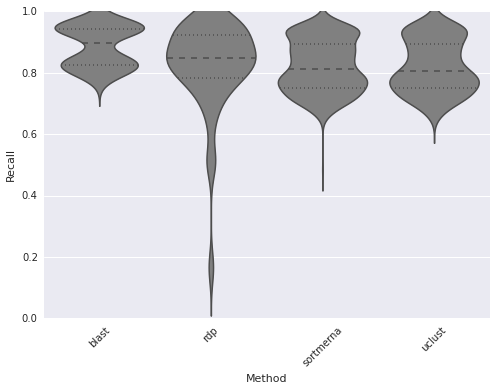

In [9]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="Recall")

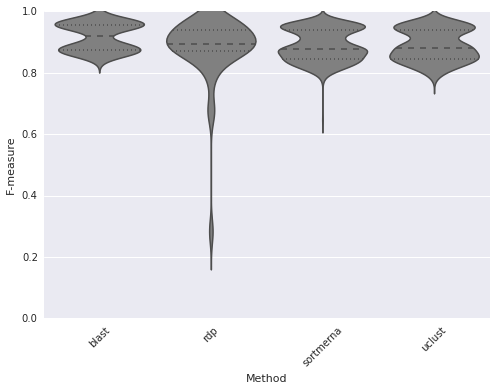

In [10]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="F-measure")

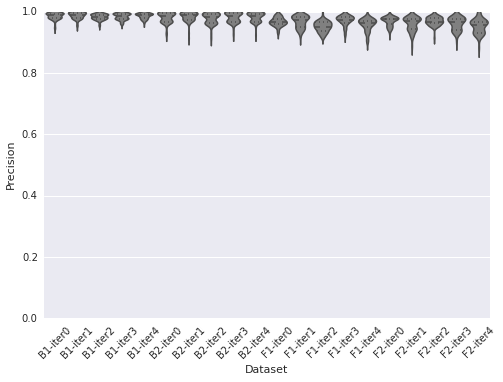

In [11]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="Precision")

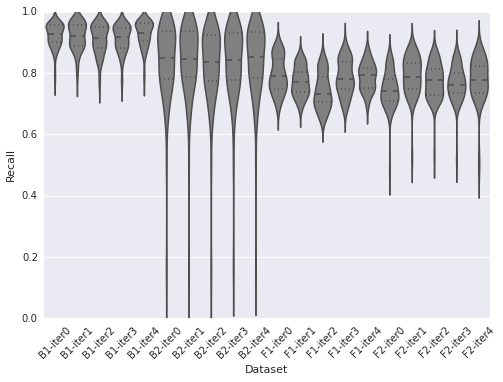

In [12]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="Recall")

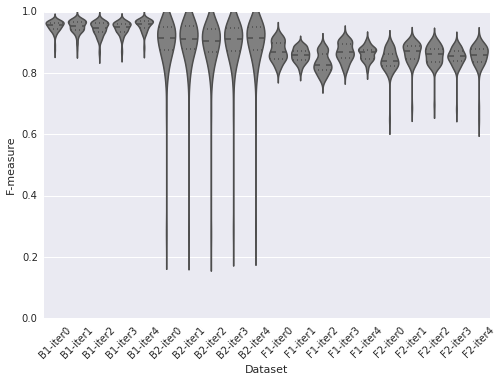

In [13]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="F-measure")

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


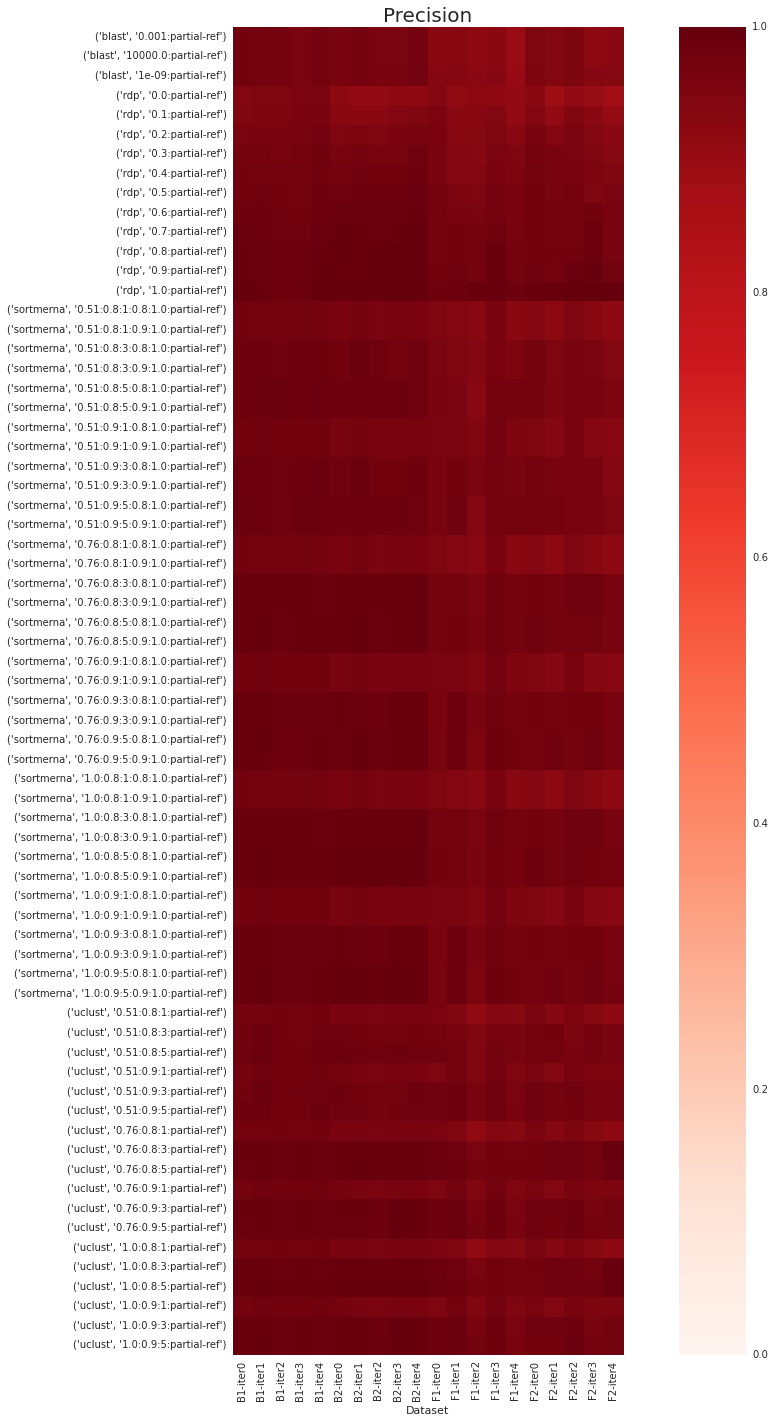

In [14]:
heatmap_from_data_frame(simulated_results, "Precision")

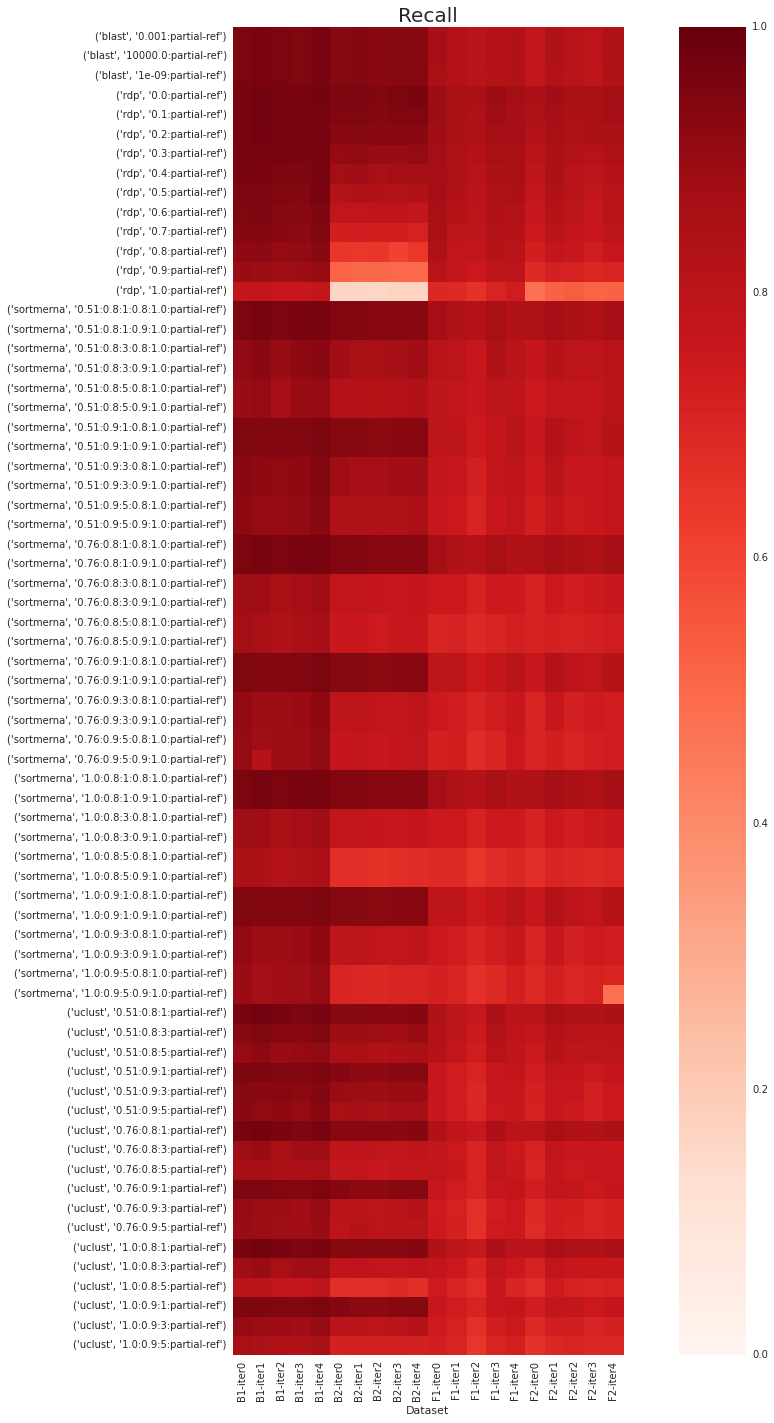

In [15]:
heatmap_from_data_frame(simulated_results, "Recall")

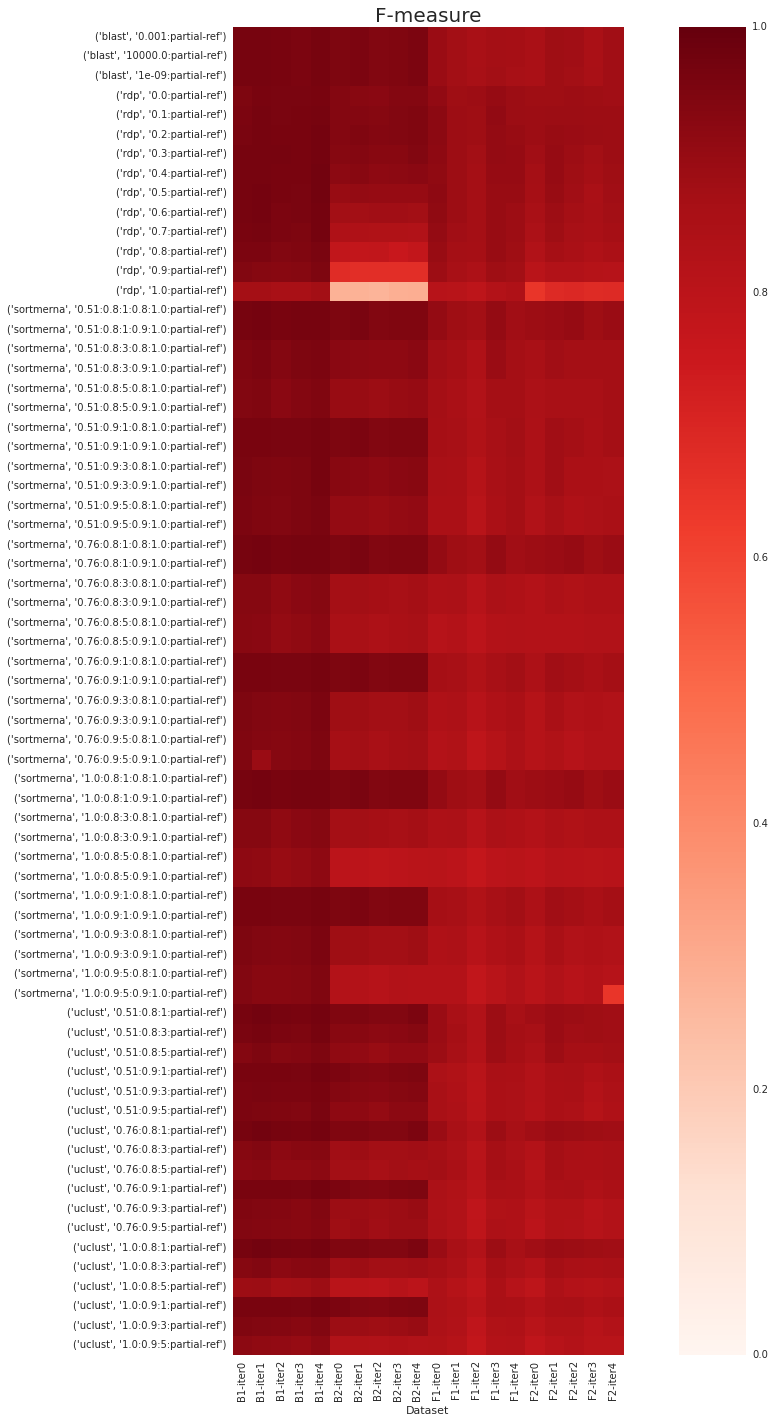

In [16]:
heatmap_from_data_frame(simulated_results, "F-measure")

In [17]:
method_by_dataset_a1(simulated_results, 'B1-iter0')

Method  Precision    Recall  F-measure
215        rdp   0.977053  0.959668   0.968282
271     uclust   0.971326  0.964413   0.967857
182  sortmerna   0.979344  0.956109   0.967587
212      blast   0.976942  0.954923   0.965807

In [18]:
method_by_dataset_a1(simulated_results, 'B2-iter0')

Method  Precision    Recall  F-measure
2166     uclust   0.971049  0.940421   0.955490
2040  sortmerna   0.964115  0.941589   0.952719
2116      blast   0.965018  0.934579   0.949555
2138        rdp   0.930126  0.948598   0.939271

In [19]:
method_by_dataset_a1(simulated_results, 'F1-iter0')

Method  Precision    Recall  F-measure
2002        rdp   0.958955  0.889273   0.922801
1950  sortmerna   0.950943  0.871972   0.909747
1981      blast   0.929630  0.868512   0.898032
2009     uclust   0.975510  0.826990   0.895131

In [20]:
method_by_dataset_a1(simulated_results, 'F2-iter0')

Method  Precision    Recall  F-measure
1170        rdp   0.964981  0.826667   0.890485
1088  sortmerna   0.940299  0.840000   0.887324
1199     uclust   0.960630  0.813333   0.880866
1160      blast   0.951417  0.783333   0.859232

## Evaluation 2: Rank-based statistics comparing the performance of the optimal parameter setting run for each method on each data set.

*Count best* column indicates how many samples a given method achieved within one median absolute deviation of the best result (which is why they sum to more than the total number of samples).

### Within-method comparisons of parameter performance

In [21]:
metrics = ['Precision', 'Recall', 'F-measure']

In [22]:
rdp_top_params = parameter_comparisons(simulated_results, "rdp", metrics=metrics)
rdp_top_params[:15]

F-measure  Precision  Recall
0.0:partial-ref         20          0      20
0.2:partial-ref         20          0      20
0.3:partial-ref         20          1      20
0.4:partial-ref         20          3      18
0.5:partial-ref         20          6      17
0.1:partial-ref         19          0      20
0.6:partial-ref         19         11      13
0.7:partial-ref         19         14       6
0.8:partial-ref          7         15       0
0.9:partial-ref          0         19       0
1.0:partial-ref          0         20       0

In [23]:
uclust_top_params = parameter_comparisons(simulated_results, "uclust", metrics=metrics)
uclust_top_params[:15]

F-measure  Precision  Recall
0.51:0.8:1:partial-ref         20          0      20
0.76:0.8:1:partial-ref         20          0      20
1.0:0.8:1:partial-ref          20          0      20
0.51:0.8:3:partial-ref         20          3      19
1.0:0.9:1:partial-ref          10          0      10
0.76:0.9:1:partial-ref         10          0      10
0.51:0.9:3:partial-ref         10          7       9
0.51:0.9:1:partial-ref         10          0      10
0.51:0.8:5:partial-ref          8          5       4
0.51:0.9:5:partial-ref          5          7       3
0.76:0.8:3:partial-ref          0         19       0
0.76:0.8:5:partial-ref          0         20       0
0.76:0.9:3:partial-ref          0         17       0
0.76:0.9:5:partial-ref          0         18       0
1.0:0.8:3:partial-ref           0         19       0

In [24]:
sortmerna_top_params = parameter_comparisons(simulated_results, "sortmerna", metrics=metrics)
sortmerna_top_params[:15]

F-measure  Precision  Recall
0.51:0.8:1:0.8:1.0:partial-ref         20          0      20
0.76:0.8:1:0.8:1.0:partial-ref         20          0      20
1.0:0.8:1:0.9:1.0:partial-ref          20          0      20
1.0:0.8:1:0.8:1.0:partial-ref          20          0      20
0.51:0.8:1:0.9:1.0:partial-ref         20          0      20
0.76:0.8:1:0.9:1.0:partial-ref         20          0      20
1.0:0.9:1:0.9:1.0:partial-ref          13          0      13
1.0:0.9:1:0.8:1.0:partial-ref          13          0      13
0.76:0.9:1:0.9:1.0:partial-ref         13          0      13
0.76:0.9:1:0.8:1.0:partial-ref         13          0      13
0.51:0.9:1:0.9:1.0:partial-ref         13          0      13
0.51:0.9:1:0.8:1.0:partial-ref         13          0      13
0.51:0.9:3:0.9:1.0:partial-ref         11          8       6
0.51:0.9:3:0.8:1.0:partial-ref         11          8       6
0.51:0.8:3:0.8:1.0:partial-ref         11          2       7

In [25]:
blast_top_params = parameter_comparisons(simulated_results, "blast", metrics=metrics)
blast_top_params[:15]

F-measure  Precision  Recall
1e-09:partial-ref           15         18      12
0.001:partial-ref           13         10      20
10000.0:partial-ref         13         10      20

### Between-method performance comparisons based on best parameter set determined above

In [26]:
mp_combs = {}
for e in ['rdp', 'blast', 'sortmerna', 'uclust']:
    mp_combs[e] = parameter_comparisons(simulated_results, e, metrics=['F-measure']).index[0]

In [27]:
metric = 'Precision'
df = performance_rank_comparisons(simulated_results, metric, mp_combs)
if write_xls_files: 
    df.to_excel('tables/level%d_%s_rankstats.xlsx' % (taxonomic_level, metric), 
                                      na_rep='NA', float_format="%1.3f")
df

Count best  blast: wilcoxon stat  blast: wilcoxon p  \
blast               7                   NaN                NaN   
sortmerna           7                    97           0.765198   
uclust              6                   100           0.851925   
rdp                 0                     4           0.000163   

           sortmerna: wilcoxon stat  sortmerna: wilcoxon p  \
blast                            97               0.765198   
sortmerna                       NaN                    NaN   
uclust                           96               0.736875   
rdp                               0               0.000089   

           uclust: wilcoxon stat  uclust: wilcoxon p  rdp: wilcoxon stat  \
blast                        100            0.851925                   4   
sortmerna                     96            0.736875                   0   
uclust                       NaN                 NaN                   1   
rdp                            1            0.000103                 NaN   

           rdp: wilcoxon p  
blast             0.000163  
sortmerna         0.000089  
uclust            0.000103  
rdp                    NaN

In [28]:
metric = 'Recall'
df = performance_rank_comparisons(simulated_results, metric, mp_combs)
if write_xls_files: 
    df.to_excel('tables/level%d_%s_rankstats.xlsx' % (taxonomic_level, metric), 
                                      na_rep='NA', float_format="%1.3f")
df

Count best  rdp: wilcoxon stat  rdp: wilcoxon p  \
rdp                19                 NaN              NaN   
uclust              1                   1         0.000103   
blast               0                   0         0.000089   
sortmerna           0                   0         0.000089   

           uclust: wilcoxon stat  uclust: wilcoxon p  blast: wilcoxon stat  \
rdp                            1            0.000103                     0   
uclust                       NaN                 NaN                    71   
blast                         71            0.334138                   NaN   
sortmerna                     32            0.006425                    19   

           blast: wilcoxon p  sortmerna: wilcoxon stat  sortmerna: wilcoxon p  
rdp                 0.000089                         0               0.000089  
uclust              0.334138                        32               0.006425  
blast                    NaN                        19               0.002225  
sortmerna           0.002225                       NaN                    NaN

In [29]:
metric = 'F-measure'
df = performance_rank_comparisons(simulated_results, metric, mp_combs)
if write_xls_files: 
    df.to_excel('tables/level%d_%s_rankstats.xlsx' % (taxonomic_level, metric), 
                                      na_rep='NA', float_format="%1.3f")
df

Count best  sortmerna: wilcoxon stat  sortmerna: wilcoxon p  \
sortmerna           9                       NaN                    NaN   
uclust              5                        39               0.013741   
blast               3                        19               0.001325   
rdp                 3                        29               0.004550   

           uclust: wilcoxon stat  uclust: wilcoxon p  blast: wilcoxon stat  \
sortmerna                     39            0.013741                    19   
uclust                       NaN                 NaN                    78   
blast                         78            0.313463                   NaN   
rdp                           90            0.575486                    87   

           blast: wilcoxon p  rdp: wilcoxon stat  rdp: wilcoxon p  
sortmerna           0.001325                  29         0.004550  
uclust              0.313463                  90         0.575486  
blast                    NaN                  87         0.501591  
rdp                 0.501591                 NaN              NaN